<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/Hierarchical_Clustering_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np      #To Prform Numerical Operation
import matplotlib.pyplot as plt   #plot something 
import pandas as pd     #To Play With Dataset

In [23]:
from google.colab import drive  #import gogle drive data

In [24]:
drive.mount('/content/drive') # mount drive data into colab cloud and enter authentication code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"  

/content/drive/My Drive/Colab Notebooks/Dataset Files


In [26]:
dataset=pd.read_csv("Hierarchical_dataset.csv")
print(dataset)
dataset.shape

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


(200, 3)

In [27]:
X= dataset.iloc[:,[1,2]].values

In [28]:
X.shape

(200, 2)

In [29]:
import scipy.cluster.hierarchy as sch

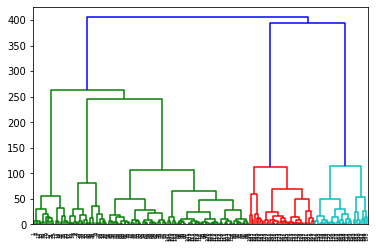

In [30]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
hc = AgglomerativeClustering(distance_threshold=None,n_clusters=5,affinity='euclidean',linkage='ward')

In [33]:
y_hc = hc.fit_predict(X)

In [34]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

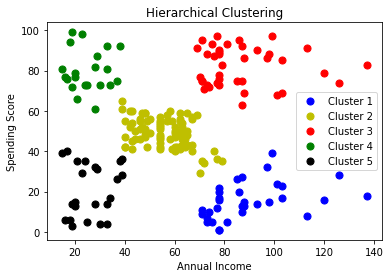

In [35]:
# visualize the cluster
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='blue',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='y',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='r',label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='green',label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='black',label='Cluster 5')

plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

In [36]:
# verifying with Kmeans

In [37]:
from sklearn.cluster import KMeans

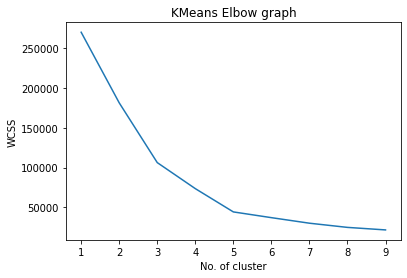

In [38]:
wcss=[]     # within cluster sum of squares
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('KMeans Elbow graph')
plt.xlabel('No. of cluster')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0) 
y_kmeans=kmeans.fit_predict(X)

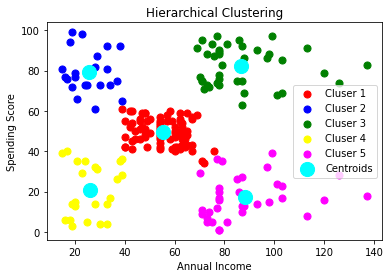

In [40]:
#Visualiz the Cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='red',label='Cluser 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='Cluser 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='green',label='Cluser 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='yellow',label='Cluser 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=50,c='magenta',label='Cluser 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'cyan', label = 'Centroids')

plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()